####Una empresa proveedora de energía eléctrica dispone de cuatro plantas de generación para satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Los costos por el transporte de energía por cada GW entre plantas y ciudades se dan en la siguiente tabla:
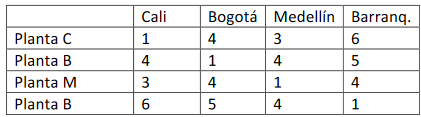
#### Los costos del KW-H por generador se dan en la siguiente tabla:
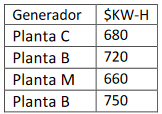
####Encontrar usando AGs el mejor despacho de energía minimizando los costos de transporte y generación.

Parámetros:

    ciudades: Lista de nombres de ciudades.
    plantas: Lista de nombres de plantas.
    capacidad: Lista de capacidades de generación de las plantas.
    necesidad: Lista de necesidades de cada ciudad.
    costo_transporte: Matriz de costos de transporte entre plantas y ciudades.
    costo_generador: Lista de costos por KW-H por generador.
    uso_min: Suma de necesidades mínimas para asegurar el suministro.

In [1]:
import random
import numpy as np

#Definir Parámetros
ciudades = ["Cali","Bogotá","Medellín","Barranquilla"]
plantas = ["C","B","M","B"]
capacidad = [3,6,5,4]
necesidad = [4,3,5,3]

costo_transporte = [
    [1,4,3,6],
    [4,1,4,5],
    [3,4,1,4],
    [6,5,4,1]
]

costo_generador= [680,720,660,750]
uso_min = sum(necesidad)

Parámetros del AG:

    pop: Tamaño de la población.
    gens: Número de generaciones.
    mut: Probabilidad de mutación.

In [2]:
#Parametros del AG
pop = 150
gens = 100
mut = 0.1 #Mutación del 10%

Funciones Principales:

    f_cc(x):
        Calcula el costo total de una solución x.
        Considera costos de generación y transporte.
        Penaliza el subuso de capacidad de generación.

    f_rnds():
        Genera una solución aleatoria.

    cruzar(padre, madre):
        Cruza dos soluciones para generar dos hijos.

    mutar(solucion):
        Aplica mutación a una solución dada.

    algoritmo_genetico():
        Implementa el Algoritmo Genético para encontrar la mejor asignación de energía.

    obtener_asignacion(mejor_solucion):
        Obtiene la asignación de energía basada en la mejor solución.

In [3]:
#Funcion para calcular costos

def f_cc(x):
    costo_t = 0
    suministro_t = [0]*len(plantas)

    for ind_c, ind_p in enumerate(x):
        costo_t += costo_generador[ind_p] * necesidad[ind_c]           #Se le suma al costo total el costo de generacion multiplicado por la necesidad de la planta
        suministro_t[ind_p] += necesidad[ind_c]

        for i in range(len(x)):
            costo_t += costo_transporte[ind_p][i]

    for planta_index, suministro in enumerate(suministro_t):
        if suministro < capacidad[planta_index]:                                  #Revisar que no haya suministro mayor a la capacidad
            costo_t += (capacidad[planta_index] - suministro) * costo_generador[planta_index]

    return costo_t

In [4]:
#Solución al azar
def f_rnds():
    return [random.randint(0, len(plantas) - 1) for _ in range(len(ciudades))]



In [5]:
#Función de Cruce
def cruzar(padre,madre):
    punto_cruce = random.randint(1, len(padre) - 1)
    hijo1 = padre[:punto_cruce] + madre[punto_cruce:]
    hijo2 = madre[:punto_cruce] + padre[punto_cruce:]
    return hijo1, hijo2



In [6]:
#Función de Mutación
def mutar(solucion):
    for i in range(len(solucion)):
        if random.random() < mut:
            solucion[i] = random.randint(0, len(plantas) - 1)
    return solucion


In [7]:
#Algoritmo genético
def algoritmo_genetico():
    poblacion = [f_rnds() for _ in range(pop)]

    for generacion in range(gens):
        poblacion = sorted(poblacion, key=lambda x: f_cc(x))
        mejores_soluciones = poblacion[:5]  # Tomar las 5 mejores soluciones

        nueva_generacion = mejores_soluciones.copy()
        while len(nueva_generacion) < pop:
            padre, madre = random.choices(mejores_soluciones, k=2)
            hijo1, hijo2 = cruzar(padre, madre)
            hijo1 = mutar(hijo1)
            hijo2 = mutar(hijo2)
            nueva_generacion.extend([hijo1, hijo2])

        poblacion = nueva_generacion

    mejor_solucion = min(poblacion, key=lambda x: f_cc(x))
    mejor_costo = f_cc(mejor_solucion)

    return mejor_solucion, mejor_costo

In [8]:
def obtener_asignacion(mejor_solucion):
    asignacion = [[0 for _ in range(len(ciudades))] for _ in range(len(plantas))]

    for ciudad_index, planta_index in enumerate(mejor_solucion):
        asignacion[planta_index][ciudad_index] += necesidad[ciudad_index]

    return asignacion

Ejecución y Resultados:

    Ejecuta el Algoritmo Genético.
    Muestra la mejor asignación de energía y su costo asociado.

In [9]:
#Comprobación
mejor_solucion, mejor_costo = algoritmo_genetico()
asignacion = obtener_asignacion(mejor_solucion)
print("Mejor asignación de energía:")
print("        C     |    Bt   |    M    |    Bq  ")
for i in range(len(plantas)):
    print(plantas[i], ": ", end="")
    for j in range(len(ciudades)):
        print(asignacion[i][j], "GW", end=" | " if j < len(ciudades) - 1 else "\n") #Cada fila representa una planta, cada columna representa una ciudad

print("Costo de la solución:", mejor_costo)

Mejor asignación de energía:
        C     |    Bt   |    M    |    Bq  
C : 0 GW | 3 GW | 0 GW | 0 GW
B : 0 GW | 0 GW | 0 GW | 3 GW
M : 0 GW | 0 GW | 5 GW | 0 GW
B : 4 GW | 0 GW | 0 GW | 0 GW
Costo de la solución: 12716
